In [40]:
from skimage import io 
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_yen
from matplotlib import pyplot as plt
import numpy as up

# Task 1

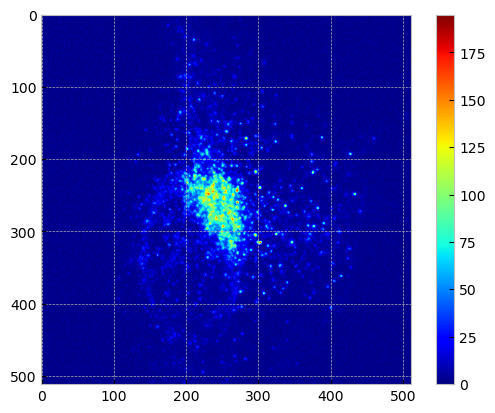

In [35]:
img_data = plt.imread('golgi-movie_robert_frame_01_gray.jpg')
plt.imshow(img_data, cmap='jet') #plotting intensity
plt.colorbar()

# Task 2

type(img_data)=<class 'numpy.ndarray'>
img_data.shape=(512, 512)
img_data.min()=0
195
1678097


Text(0.5, 1.0, 'Background noise values')

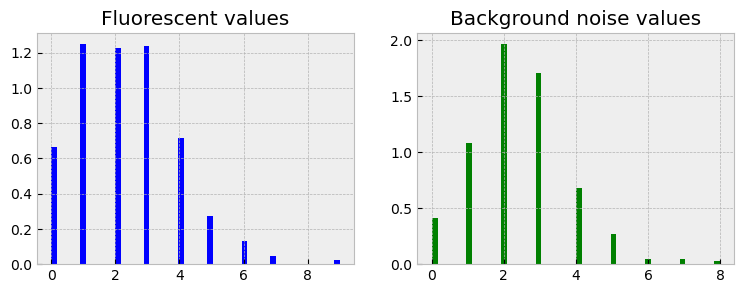

In [36]:
print(f'{type(img_data)=}', 
      f'{img_data.shape=}', #dimension of image, 2D image in W and B channels
      f'{img_data.min()=}', #tells us the dimmest pixel, which is 0, likely background noise
      f'{img_data.max()}', #brightest pixel value
      f'{img_data.sum()}', #sums all the overall brightness of pixels in the image
      sep='\n')

plt.style.use('bmh')
fluorescent_data = img_data[:, 0].flatten()
bg_data = img_data[:, 1].flatten()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
ax_fluorescent, ax_background = ax


ax_fluorescent.hist(fluorescent_data, color='blue', bins=50, density=True) #bins is thickness of the bars
ax_fluorescent.set_title('Fluorescent values')


ax_background.hist(bg_data, color='green', bins=50, density=True)
ax_background.set_title('Background noise values')

# Task 3

In [52]:
total_fluorescence = [] #empty list for the loop to add in everytime it reiterates

for i in range(1, 18): #since the file is named 01 - 17, use range(). But, cannot factor in the leading zero of single numbers.
    img = io.imread(f'golgi-movie_robert_frame_{i:02}_gray.jpg') #0 refers to adding leading zeros if needed, and 2 specifies the minimum character in the number which is 2
    total_fluorescence.append(img.sum()) #since the graph Y axis uses total fluorescence signal, sum is most appropriate. After it calculates the sum, add it to total_fluorescence list 

# print(total_fluorescence) #sanitary check to see if my function and array works





[1678097, 1635644, 1816652, 1777037, 1747933, 1689746, 1651677, 1603658, 1484451, 1413813, 1339107, 1287205, 1223687, 1170396, 1123362, 1057297, 1030133]


C:\Users\austi\AppData\Local\Temp\ipykernel_30320\3056161896.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


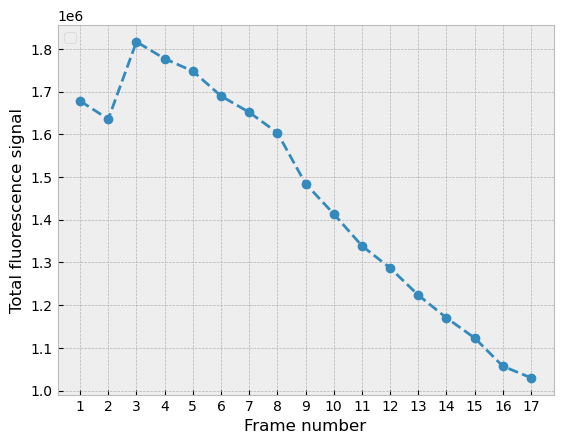

In [76]:
x = range(1,18)
y = total_fluorescence

#plotting segment
plt.plot(x, y, linestyle = 'dashed', marker = 'o') #marker is the data point marked as circle.

#labels
plt.xticks(x) #this makes it show every tick in X axis
plt.xlabel('Frame number')
plt.ylabel('Total fluorescence signal')

#aesthetics
plt.grid(alpha = 1)



plt.show()